# Sujet : Personnalisation des recommandations des produits dans le cadre d’un site E-commerce

**Réaliser par :**
   *Achraf Akrache* et 
   *Asmae Moubarriz*
- Variable décisionnelle : catégories de produits 
 
- Lien de téléchargement du jeu de données https://www.kaggle.com/datasets/kartikeybartwal/ecommerce-product-recommendation-collaborative 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
#approche1
from sklearn.neighbors import KNeighborsClassifier
#approche2
from sklearn.linear_model import LogisticRegression
#approche3
from sklearn.tree import DecisionTreeClassifier
#approche4
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Phase d'exploration 


Chargement des données depuis le fichier csv

In [492]:
data = pd.read_csv('user_personalized_features.csv')

- notre dataset est composée de 15 columns dont 9 colomns avec des valeurs numérique .
- notre dataset est de taille 1000 record

In [493]:
data.describe() # Résumé des statistiques descriptives

,Unnamed: 0,Age,Income,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Time_Spent_on_Site_Minutes,Pages_Viewed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,40.986000,81304.732000,15.586000,4.631000,104.039000,2552.957000,297.360000,24.40300
std,288.819436,13.497852,37363.972753,8.205604,2.837762,54.873569,1420.985048,175.596123,14.02017
min,0.000000,18.000000,20155.000000,1.000000,0.000000,10.000000,112.000000,2.000000,1.00000
25%,249.750000,29.000000,48715.500000,8.000000,2.000000,58.000000,1271.750000,144.000000,12.00000
50%,499.500000,42.000000,81042.000000,16.000000,5.000000,105.000000,2542.000000,292.500000,24.50000
75%,749.250000,52.000000,112694.500000,23.000000,7.000000,150.000000,3835.500000,449.250000,36.00000
max,999.000000,64.000000,149951.000000,29.000000,9.000000,199.000000,4999.000000,599.000000,49.00000


In [494]:
data.info() # Résumé des types de données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1000 non-null   int64 
 1   User_ID                      1000 non-null   object
 2   Age                          1000 non-null   int64 
 3   Gender                       1000 non-null   object
 4   Location                     1000 non-null   object
 5   Income                       1000 non-null   int64 
 6   Interests                    1000 non-null   object
 7   Last_Login_Days_Ago          1000 non-null   int64 
 8   Purchase_Frequency           1000 non-null   int64 
 9   Average_Order_Value          1000 non-null   int64 
 10  Total_Spending               1000 non-null   int64 
 11  Product_Category_Preference  1000 non-null   object
 12  Time_Spent_on_Site_Minutes   1000 non-null   int64 
 13  Pages_Viewed                 1000 

### Visualisation des relations entre la variable décisionelle et les autre colonnes

In [495]:
categorical_columns = ['Gender', 'Location', 'Interests']
numerical_columns = ['Age', 'Income', 'Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value', 
                     'Total_Spending', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed']

target = 'Product_Category_Preference'

### Plot pour les colonnes de type objet

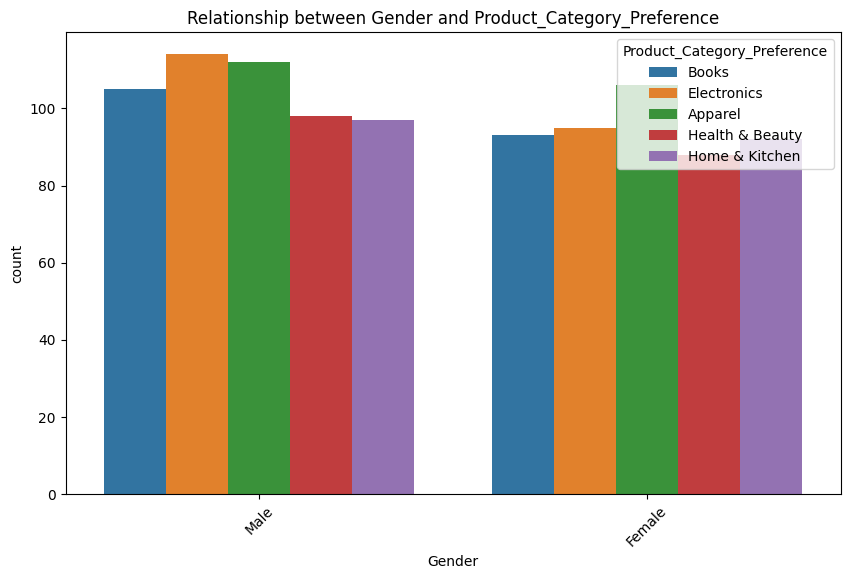

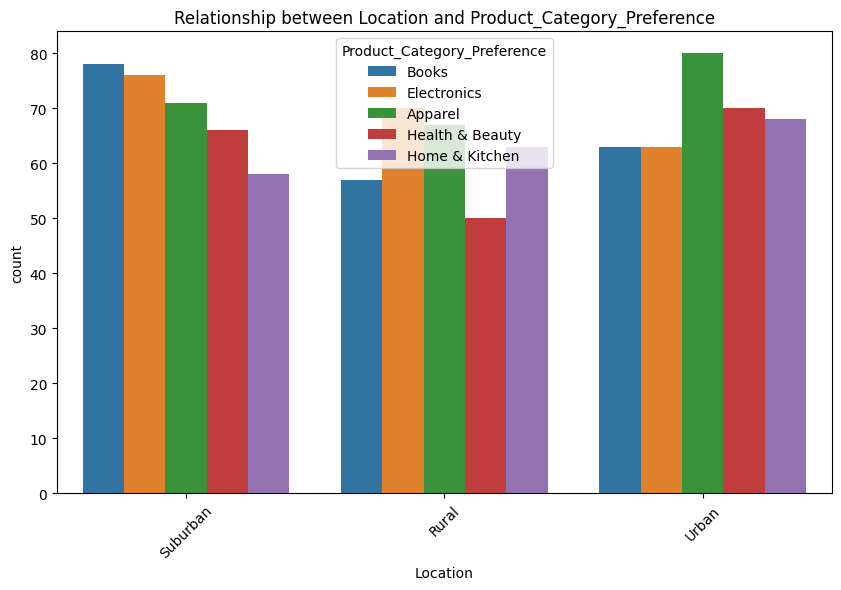

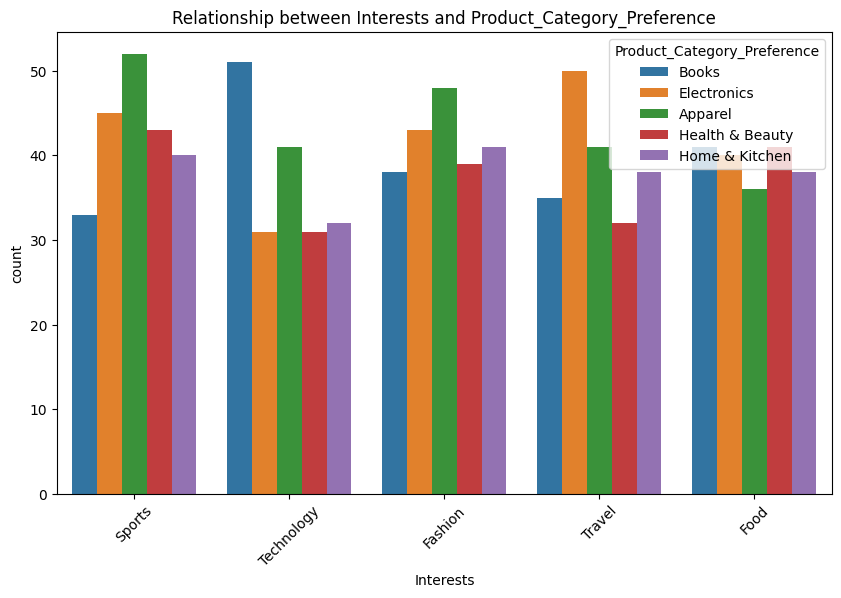

In [496]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, hue=target)
    plt.title(f'Relationship between {col} and {target}')
    plt.xticks(rotation=45)
    plt.show()

# Phase de pré-traitement

### Correction des valeurs aberrantes

- selection des variables numérique
- calcule de l'asymétrie de chaque column 
- calcule du inner bound et outer bound
- rendre les valeurs abérantes null

In [497]:
# Selection des variables numériques
data_numerical = data.select_dtypes(include=[np.number])
data_numerical.head()

,Unnamed: 0,Age,Income,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Time_Spent_on_Site_Minutes,Pages_Viewed
0,0,56,38037,5,7,18,2546,584,38
1,1,46,103986,15,7,118,320,432,40
2,2,32,101942,28,1,146,3766,306,1
3,3,60,71612,18,3,163,4377,527,29
4,4,25,49725,2,5,141,4502,53,10


*on remarque la valeur du skewness est presque null dans tous les colonnees ce qui montre l'abscence des valeurs abérantes*

In [498]:
# Calcule de l'asymétrie des variables numériques
for column in data.select_dtypes(include=[np.number]).columns:
    skewness_per_column = data[column].skew()
    print(f"Skewness for {column} is {skewness_per_column}")

Skewness for Unnamed: 0 is 0.0
Skewness for Age is -0.046883220802412674
Skewness for Income is 0.0985078994287348
Skewness for Last_Login_Days_Ago is -0.0667529892316686
Skewness for Purchase_Frequency is -0.03551313447193858
Skewness for Average_Order_Value is 0.0314231961140403
Skewness for Total_Spending is 0.003128740092689204
Skewness for Time_Spent_on_Site_Minutes is 0.02435168716510395
Skewness for Pages_Viewed is 0.037588211407260146


In [499]:
data.isnull().sum()

Unnamed: 0                     0
User_ID                        0
Age                            0
Gender                         0
Location                       0
Income                         0
Interests                      0
Last_Login_Days_Ago            0
Purchase_Frequency             0
Average_Order_Value            0
Total_Spending                 0
Product_Category_Preference    0
Time_Spent_on_Site_Minutes     0
Pages_Viewed                   0
Newsletter_Subscription        0
dtype: int64

In [500]:
# Suppression des colonnes inutiles
data.drop(['Unnamed: 0' ,'User_ID','Last_Login_Days_Ago','Time_Spent_on_Site_Minutes','Pages_Viewed','Newsletter_Subscription'], axis=1, inplace=True)

- Generation d'un nouveau fichier csv avec les données traitées 
- Chargement des nouvelles données

In [501]:
data.to_csv('user_personalized_features_cleaned.csv', index=False)
data.empty
data = pd.read_csv('user_personalized_features_cleaned.csv')
data

,Age,Gender,Location,Income,Interests,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference
0,56,Male,Suburban,38037,Sports,7,18,2546,Books
1,46,Female,Rural,103986,Technology,7,118,320,Electronics
2,32,Female,Suburban,101942,Sports,1,146,3766,Apparel
3,60,Female,Suburban,71612,Fashion,3,163,4377,Apparel
4,25,Male,Suburban,49725,Travel,5,141,4502,Health & Beauty
...,...,...,...,...,...,...,...,...,...
995,22,Male,Urban,104162,Technology,7,83,607,Apparel
996,40,Male,Urban,99003,Travel,3,180,431,Apparel
997,27,Female,Urban,72395,Technology,8,130,650,Books
998,61,Male,Rural,59758,Travel,3,152,1041,Electronics


# Phase d'Entrainement 

### Premier Essaie :
 - type d'encodage (Label Encodage)
 - model essayé : Logistic Regression , decisionTree , RandomTreeClassifier
 - accuracy ne dépace pas 20%

####  Encodage des variables avec **Label Encodage** 

In [ ]:
data_label_encoded = data.copy()

In [ ]:
# Encodage des variables catégorielles
Genderencodage = LabelEncoder()
data_label_encoded['Gender']=Genderencodage.fit_transform(data_label_encoded['Gender'])
Locationencodage = LabelEncoder()
data_label_encoded['Location']=Locationencodage.fit_transform(data_label_encoded['Location'])
Interestsencodage = LabelEncoder()
data_label_encoded['Interests']=Interestsencodage.fit_transform(data_label_encoded['Interests'])
data_label_encoded.head()


,Age,Gender,Location,Income,Interests,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference
0,56,1,1,38037,2,7,18,2546,Books
1,46,0,0,103986,3,7,118,320,Electronics
2,32,0,1,101942,2,1,146,3766,Apparel
3,60,0,1,71612,0,3,163,4377,Apparel
4,25,1,1,49725,4,5,141,4502,Health & Beauty


In [502]:
# Encodage de la variable cible
#Category_encoder = LabelEncoder()
#data['Product_Category_Preference']=Category_encoder.fit_transform(data['Product_Category_Preference'])
#data.head()

### split des valeurs test et entrainement 

- on definie le X , qui est notre dataset sans la variable decisionnelle
- on definie le y qui est la colonne de la variable décisionnelle (product_category_preference)

In [505]:
X = data.drop(columns=['Product_Category_Preference_Home & Kitchen' ,
                       'Product_Category_Preference_Health & Beauty',
                       'Product_Category_Preference_Books',
                       'Product_Category_Preference_Electronics'])  # Variables prédictives
y = data[['Product_Category_Preference_Home & Kitchen' ,
                       'Product_Category_Preference_Health & Beauty',
                       'Product_Category_Preference_Books',
                       'Product_Category_Preference_Electronics']].idxmax(axis=1)  # Variable cible


In [ ]:
X= data.drop(columns=['Product_Category_Preference'])  # Variables prédictives
y = data['Product_Category_Preference']  # Variable cible

In [507]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [508]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Prémiére Approche (Logistic Regression)

### Entrainement avec Regression Logistic
- On utilise Logistic regression comme modèle de classification.
- Idéal pour les relations linéaires.
- Facile à mettre en œuvre et à interpréter.
- Gère la classification multiclasse à l’aide d’une stratégie **multinomiale**.

**Exemple**

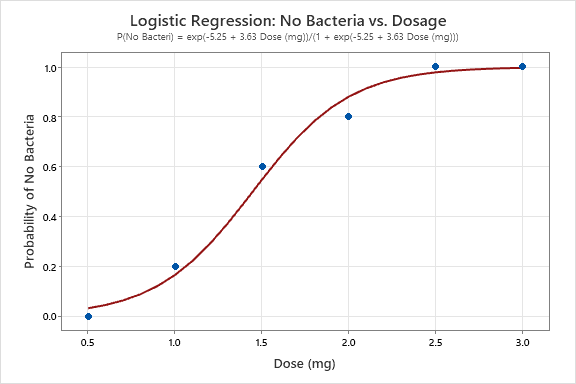


In [509]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train)

c:\Users\Elitebook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Phase de test 

In [510]:
y_pred = LogisticRegressionModel.predict(X_test)

print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test accuracy: 0.425

Classification Report:
                                             precision    recall  f1-score   support

          Product_Category_Preference_Books       0.00      0.00      0.00        34
    Product_Category_Preference_Electronics       0.33      0.02      0.04        44
Product_Category_Preference_Health & Beauty       0.00      0.00      0.00        38
 Product_Category_Preference_Home & Kitchen       0.43      1.00      0.60        84

                                   accuracy                           0.42       200
                                  macro avg       0.19      0.26      0.16       200
                               weighted avg       0.25      0.42      0.26       200



c:\Users\Elitebook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Elitebook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Elitebook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

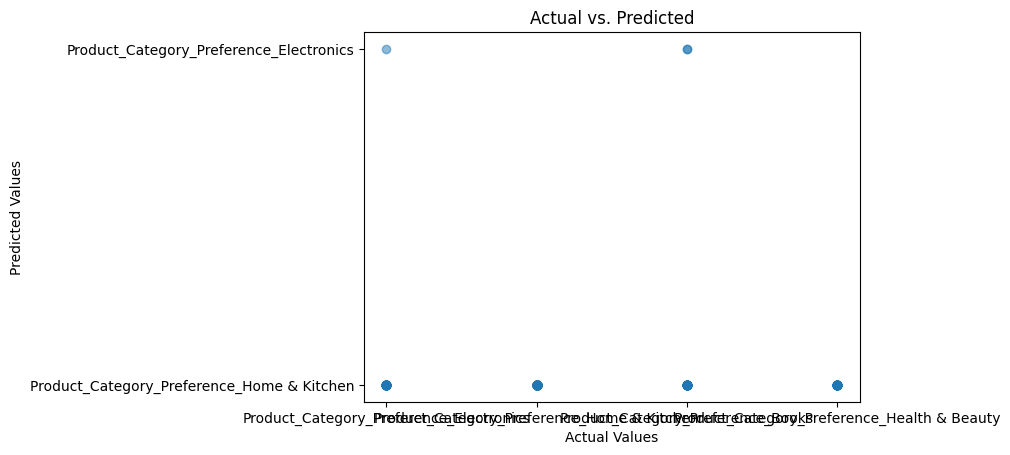

In [511]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()


## Synthése

*On tombe dans le cas du underfitting ce qui nous a pousser à migrer à un model plus complexe que la regression logistic*

## Deuxiéme Approche (Decision Tree)

### Entrainement avec Arbre de décision 
- On utilise Decision Tree comme modèle de classification.
- Il capture les relations non linéaires entre les classes .
- Facile à visualiser et à interpréter.
- Fonctionne bien sur les ensembles de données petits à moyens.

**Exemple**

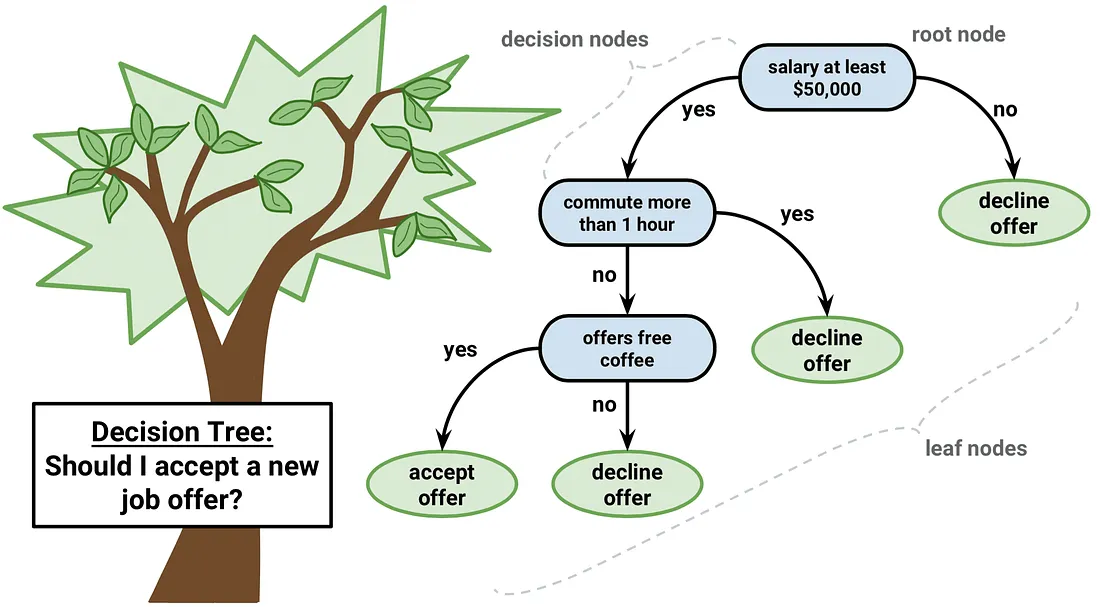

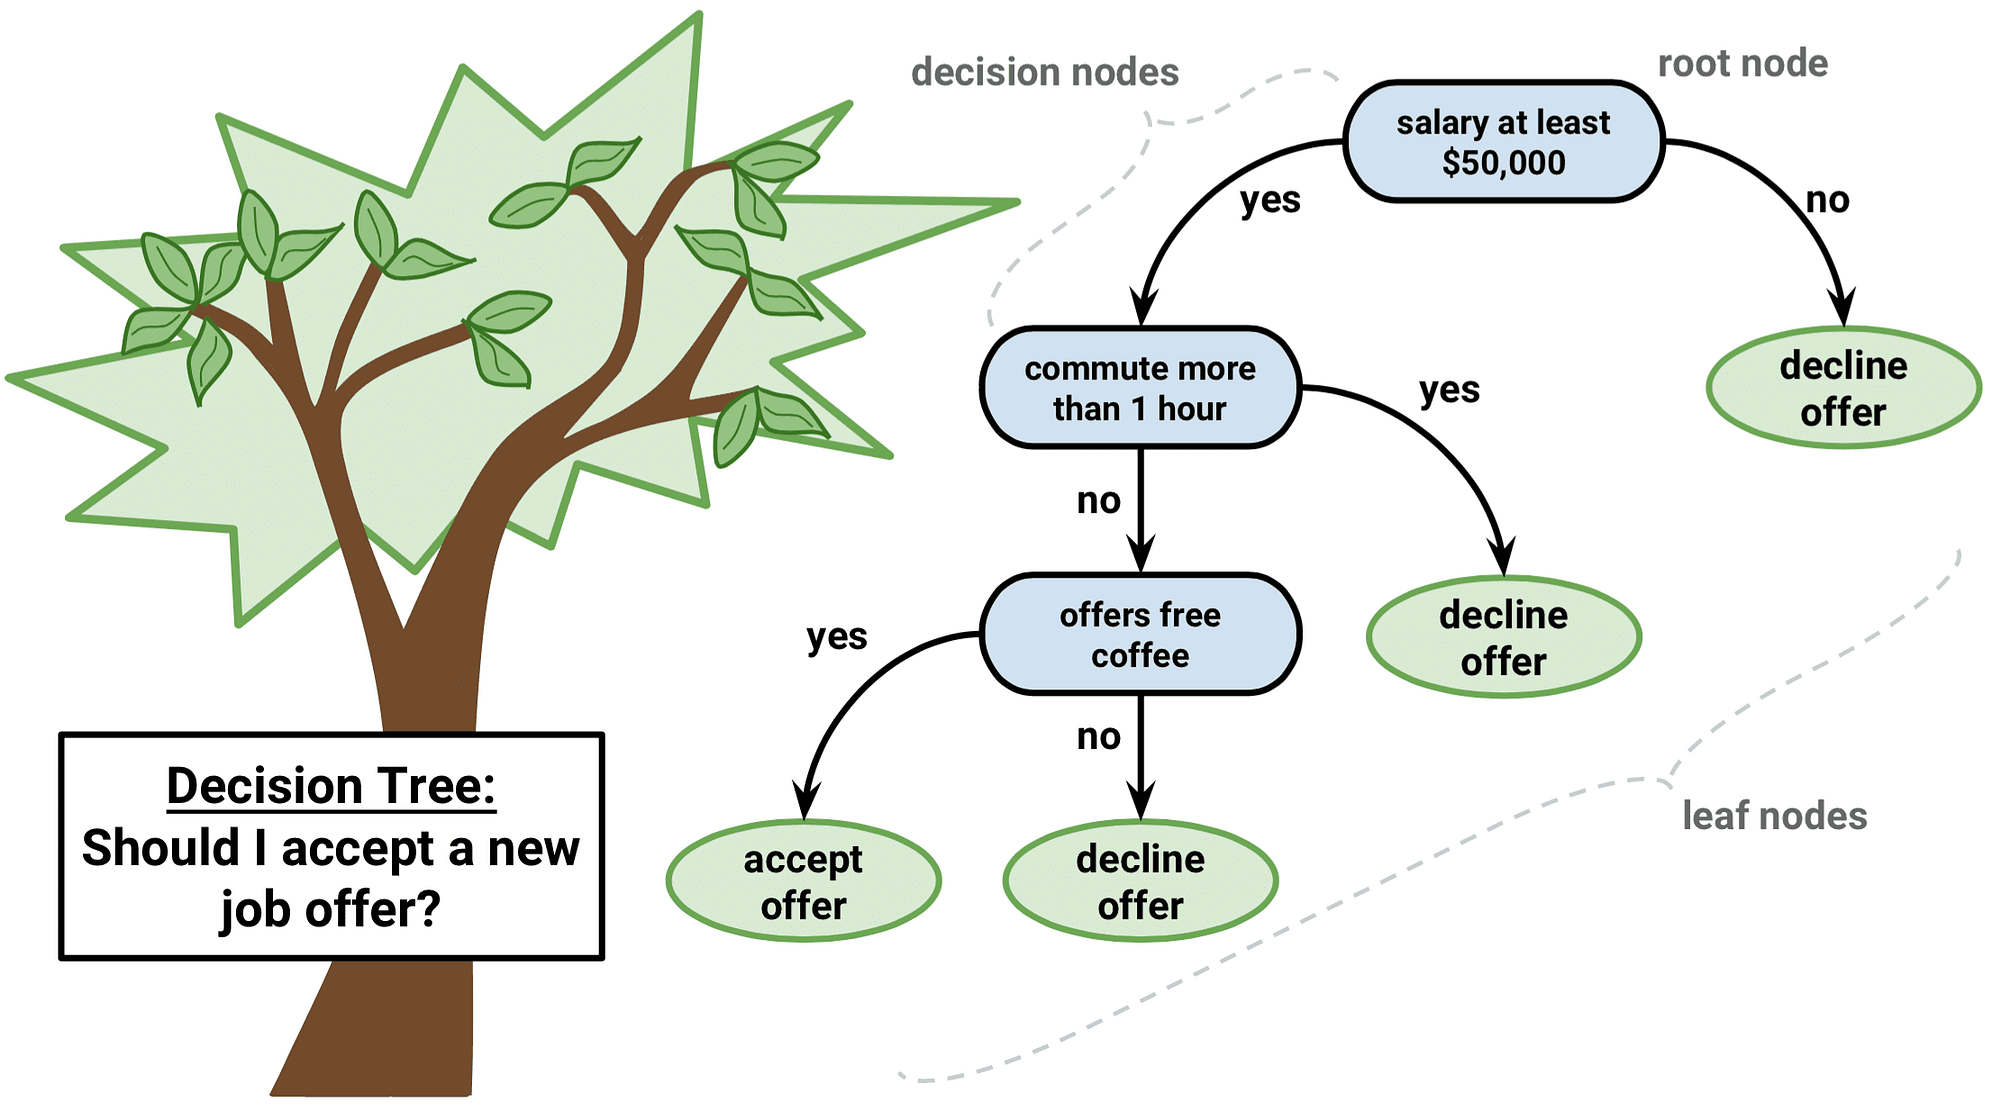

In [512]:

DecisionTreeClassifierModel =DecisionTreeClassifier(
    max_depth=3, # Profondeur maximale de l'arbre
)
DecisionTreeClassifierModel.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

### Phase de test 

- le score maintenant dépasse les 0.20 dans le score d'accuracy

In [513]:
y_pred = DecisionTreeClassifierModel.predict(X_test)

print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
#target_names=Category_encoder.classes_
print(classification_report(y_test, y_pred))

Test accuracy: 0.41

Classification Report:
                                             precision    recall  f1-score   support

          Product_Category_Preference_Books       0.20      0.03      0.05        34
    Product_Category_Preference_Electronics       0.00      0.00      0.00        44
Product_Category_Preference_Health & Beauty       0.00      0.00      0.00        38
 Product_Category_Preference_Home & Kitchen       0.42      0.96      0.58        84

                                   accuracy                           0.41       200
                                  macro avg       0.15      0.25      0.16       200
                               weighted avg       0.21      0.41      0.25       200



c:\Users\Elitebook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Elitebook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Elitebook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

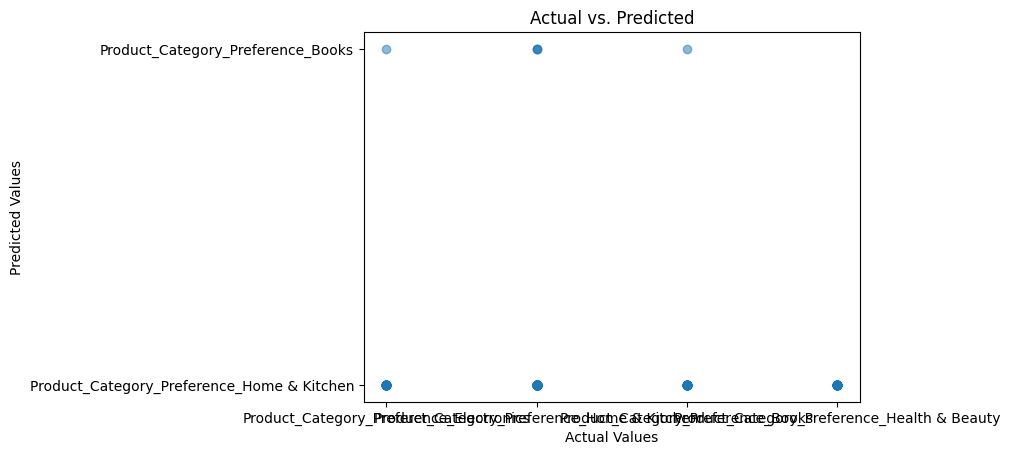

In [514]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()

### Syntése
on remarque que la class books n'est pas détecté du tout d'où on a opté à utiliser un modéle dérivant de l'arbre de décision mais plus puissant pour mieux créer le lien ou le chemin de la classe Books.

# Troisiéme approche (RandomForestClassifier)

- Le **Random Forest Classifier** offre une grande précision en combinant plusieurs arbres de décision, réduisant ainsi le risque de surapprentissage. 
- Il est capable de traiter des données mixtes (catégoriques et numériques) et reste robuste face aux données manquantes.
- il permet d'identifier les caractéristiques les plus importantes pour les prédictions, rendant le modèle interprétable.

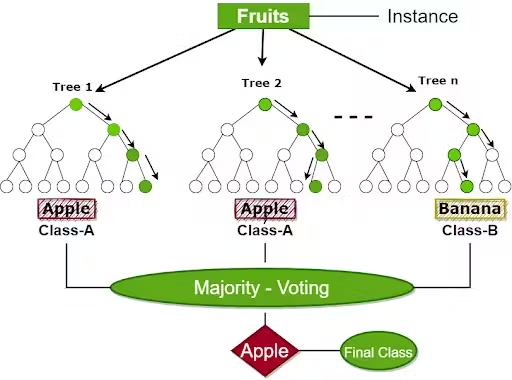

In [515]:
RandomForestClassifierModel = RandomForestClassifier(
    n_estimators=1000, # Nombre d'arbres
    max_depth=3, # Profondeur maximale de l'arbre
)
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=1000)

In [516]:
y_pred = RandomForestClassifierModel.predict(X_test)

print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
#target_names=Category_encoder.classes_
print(classification_report(y_test, y_pred))

Test accuracy: 0.415

Classification Report:
                                             precision    recall  f1-score   support

          Product_Category_Preference_Books       0.33      0.03      0.05        34
    Product_Category_Preference_Electronics       0.00      0.00      0.00        44
Product_Category_Preference_Health & Beauty       0.00      0.00      0.00        38
 Product_Category_Preference_Home & Kitchen       0.42      0.98      0.59        84

                                   accuracy                           0.41       200
                                  macro avg       0.19      0.25      0.16       200
                               weighted avg       0.23      0.41      0.26       200



c:\Users\Elitebook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Elitebook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Elitebook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [504]:
data = pd.get_dummies(data, drop_first=True)
data.head()


,Age,Gender,Location,Income,Interests,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference_Books,Product_Category_Preference_Electronics,Product_Category_Preference_Health & Beauty,Product_Category_Preference_Home & Kitchen
0,56,1,1,38037,2,7,18,2546,True,False,False,False
1,46,0,0,103986,3,7,118,320,False,True,False,False
2,32,0,1,101942,2,1,146,3766,False,False,False,False
3,60,0,1,71612,0,3,163,4377,False,False,False,False
4,25,1,1,49725,4,5,141,4502,False,False,True,False
